In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,classification_report
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [84]:

df = pd.read_csv(r"C:\Users\Asus\Downloads\laptop_price.csv", encoding="latin1")



In [85]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [87]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [88]:
def full_report(df):
    dtypes = df.dtypes
    n_unique = df.nunique()
    u_ratio = ((n_unique / len(df)) * 100).round(2).astype(str) + '%'
    nulls = df.isnull().sum()
    n_ratio = ((nulls / len(df)) * 100).round(2).astype(str) + '%'
    mod_or_mean = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            try:
                mean_val = df[col].mean()
                mod_or_mean.append(f"mean = {round(mean_val, 2)}")
            except:
                mod_or_mean.append("mean = NaN")
        else:
            try:
                mode_val = df[col].mode().iloc[0]
                mod_or_mean.append(f"mode = {mode_val}")
            except:
                mod_or_mean.append("mode = NaN")
    full_report_df = pd.DataFrame({'DTypes': dtypes,'N_Uniq': n_unique,'U Ratio': u_ratio,'Nulls': nulls,'N_Ratio': n_ratio,'Mode or Mean': mod_or_mean})
    print(f"{'*'*50}")
    print(f'Empty Rows: {df.isnull().all(axis=1).sum()}')
    print(f'Empty Columns: {df.isnull().all(axis=0).sum()}')
    print(f'Duplicate Rows: {df.duplicated().sum()}')
    print(f'Number of Rows: {df.shape[0]}')
    print(f'Number of Columns: {df.shape[1]}')
    print(f"{'*'*50}")
    return full_report_df

In [89]:
full_report(df)

**************************************************
Empty Rows: 0
Empty Columns: 0
Duplicate Rows: 0
Number of Rows: 1303
Number of Columns: 13
**************************************************


,DTypes,N_Uniq,U Ratio,Nulls,N_Ratio,Mode or Mean
laptop_ID,int64,1303,100.0%,0,0.0%,mean = 660.16
Company,object,19,1.46%,0,0.0%,mode = Dell
Product,object,618,47.43%,0,0.0%,mode = XPS 13
TypeName,object,6,0.46%,0,0.0%,mode = Notebook
Inches,float64,18,1.38%,0,0.0%,mean = 15.02
ScreenResolution,object,40,3.07%,0,0.0%,mode = Full HD 1920x1080
Cpu,object,118,9.06%,0,0.0%,mode = Intel Core i5 7200U 2.5GHz
Ram,object,9,0.69%,0,0.0%,mode = 8GB
Memory,object,39,2.99%,0,0.0%,mode = 256GB SSD
Gpu,object,110,8.44%,0,0.0%,mode = Intel HD Graphics 620


In [90]:
print( df.duplicated().sum() )

0


In [91]:
df=df.drop_duplicates()

In [92]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [93]:
df["OpSys"].replace("No OS",np.nan,inplace=True)
df["OpSys"]=df["OpSys"].fillna(df["OpSys"].mode()[0])

C:\Users\Asus\AppData\Local\Temp\ipykernel_24000\1682972739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["OpSys"].replace("No OS",np.nan,inplace=True)


In [94]:
df["OpSys"].replace("No OS",np.nan,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_24000\2542516149.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["OpSys"].replace("No OS",np.nan,inplace=True)


In [95]:
df["OpSys"].replace("Windows 10","Windows",inplace=True)
df["OpSys"].replace("Windows 10 S","Windows",inplace=True)
df["OpSys"].replace("Windows 7","Windows",inplace=True)
df["OpSys"].replace("macOS","mac",inplace=True)
df["OpSys"].replace("Mac OS X","mac",inplace=True)



C:\Users\Asus\AppData\Local\Temp\ipykernel_24000\2186612492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["OpSys"].replace("Windows 10","Windows",inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_24000\2186612492.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [96]:
df["OpSys"].value_counts()

OpSys
Windows      1191
Linux          62
Chrome OS      27
mac            21
Android         2
Name: count, dtype: int64

In [97]:
df["Ram"].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [98]:
df["Ram"]=df["Ram"].map({"8GB":8,"4GB":4,"16GB":16,"6GB":6,"12GB":12,"2GB":2,"32GB":32,"24GB":24,"64GB":64
    
})

In [99]:
df["Ram"].value_counts()

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [100]:
df.drop(columns=["laptop_ID"],axis=1,inplace=True)

In [101]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,mac,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,mac,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,mac,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,mac,1.37kg,1803.60


In [102]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [103]:

df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)
df["IPS"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

def resolution_type(x):
    if "3840x2160" in x:
        return "4K"
    elif "1920x1080" in x:
        return "Full HD"
    elif "1366x768" in x:
        return "HD"
    else:
        return "Other"

df["Resolution_Type"] = df["ScreenResolution"].apply(resolution_type)

In [104]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Resolution_Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,mac,1.37kg,1339.69,0,1,Other
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,mac,1.34kg,898.94,0,0,Other
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,1.86kg,575.00,0,0,Full HD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,mac,1.83kg,2537.45,0,1,Other
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,mac,1.37kg,1803.60,0,1,Other


In [105]:
df["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [106]:
df["TypeName"].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [107]:
df["OpSys"].value_counts()

OpSys
Windows      1191
Linux          62
Chrome OS      27
mac            21
Android         2
Name: count, dtype: int64

In [108]:
df["Resolution_Type"].value_counts()

Resolution_Type
Full HD    841
HD         308
Other      111
4K          43
Name: count, dtype: int64

In [109]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [110]:
def memory_to_gb(df):
    df["Memory_GB"] = 0
    for i, row in df["Memory"].items():
        size_match = re.search(r"(\d+\.?\d*)", row)  
        if size_match:
            size = float(size_match.group(1))
            if "TB" in row:
                size *= 1024   
            df.at[i, "Memory_GB"] = size
    return df


def extract_storage_type(memory_value):
    memory_value = str(memory_value).lower()
    if "ssd" in memory_value:
        return "SSD"
    elif "hdd" in memory_value:
        return "HDD"
    else:
        return "Other"

df["Storage_Type"] = df["Memory"].apply(extract_storage_type)



df = memory_to_gb(df)



In [111]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Resolution_Type,Storage_Type,Memory_GB
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,mac,1.37kg,1339.69,0,1,Other,SSD,128
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,mac,1.34kg,898.94,0,0,Other,Other,128
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,1.86kg,575.00,0,0,Full HD,SSD,256
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,mac,1.83kg,2537.45,0,1,Other,SSD,512
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,mac,1.37kg,1803.60,0,1,Other,SSD,256


In [112]:
df["Gpu"].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [113]:
df["GPU_Brand"] = df["Gpu"].apply(lambda x: x.split()[0])


In [114]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Resolution_Type,Storage_Type,Memory_GB,GPU_Brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,mac,1.37kg,1339.69,0,1,Other,SSD,128,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,mac,1.34kg,898.94,0,0,Other,Other,128,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,1.86kg,575.00,0,0,Full HD,SSD,256,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,mac,1.83kg,2537.45,0,1,Other,SSD,512,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,mac,1.37kg,1803.60,0,1,Other,SSD,256,Intel


In [115]:
df["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [116]:
def extract_cpu_brand(cpu_value):
    if "Intel Core i3" in cpu_value:
        return "Intel Core i3"
    elif "Intel Core i5" in cpu_value:
        return "Intel Core i5"
    elif "Intel Core i7" in cpu_value:
        return "Intel Core i7"
    elif "Intel Core i9" in cpu_value:
        return "Intel Core i9"
    elif "AMD" in cpu_value:
        return "AMD"
    else:
        return "Other"

df["CPU_Brand"] = df["Cpu"].apply(extract_cpu_brand)


In [117]:
df.head()



,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Resolution_Type,Storage_Type,Memory_GB,GPU_Brand,CPU_Brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,mac,1.37kg,1339.69,0,1,Other,SSD,128,Intel,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,mac,1.34kg,898.94,0,0,Other,Other,128,Intel,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,1.86kg,575.00,0,0,Full HD,SSD,256,Intel,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,mac,1.83kg,2537.45,0,1,Other,SSD,512,AMD,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,mac,1.37kg,1803.60,0,1,Other,SSD,256,Intel,Intel Core i5


In [118]:

df.drop(columns=["ScreenResolution","Cpu","Gpu","Memory","Product"],axis=1,inplace=True)


In [119]:
df["Storage_Type"].value_counts()


Storage_Type
SSD      843
HDD      376
Other     84
Name: count, dtype: int64

In [120]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,Resolution_Type,Storage_Type,Memory_GB,GPU_Brand,CPU_Brand
0,Apple,Ultrabook,13.3,8,mac,1.37kg,1339.69,0,1,Other,SSD,128,Intel,Intel Core i5
1,Apple,Ultrabook,13.3,8,mac,1.34kg,898.94,0,0,Other,Other,128,Intel,Intel Core i5
2,HP,Notebook,15.6,8,Windows,1.86kg,575.00,0,0,Full HD,SSD,256,Intel,Intel Core i5
3,Apple,Ultrabook,15.4,16,mac,1.83kg,2537.45,0,1,Other,SSD,512,AMD,Intel Core i7
4,Apple,Ultrabook,13.3,8,mac,1.37kg,1803.60,0,1,Other,SSD,256,Intel,Intel Core i5


In [121]:
df['Weight'] = df['Weight'].str.replace(r'[^\d\.]', '', regex=True)
df['Weight'] = pd.to_numeric(df['Weight'])
data_frame=df.copy()

In [122]:
numerical_columns=df.select_dtypes(include=["float","int64"])
numerical_columns.drop(columns=["Price_euros"],axis=1,inplace=True)

In [123]:
df["CPU_Brand"].value_counts()

CPU_Brand
Intel Core i7    527
Intel Core i5    423
Other            155
Intel Core i3    136
AMD               62
Name: count, dtype: int64

In [124]:
numerical_columns

,Inches,Ram,Weight,Touchscreen,IPS,Memory_GB
0,13.3,8,1.37,0,1,128
1,13.3,8,1.34,0,0,128
2,15.6,8,1.86,0,0,256
3,15.4,16,1.83,0,1,512
4,13.3,8,1.37,0,1,256
...,...,...,...,...,...,...
1298,14.0,4,1.80,1,1,128
1299,13.3,16,1.30,1,1,512
1300,14.0,2,1.50,0,0,64
1301,15.6,6,2.19,0,0,1024


In [125]:
df["Memory_GB"].value_counts()

Memory_GB
256       424
1024      250
500       132
512       122
131072     96
262144     84
128        81
32         45
524288     18
64         16
2048       16
16         10
180         5
65536       1
240         1
8           1
508         1
Name: count, dtype: int64

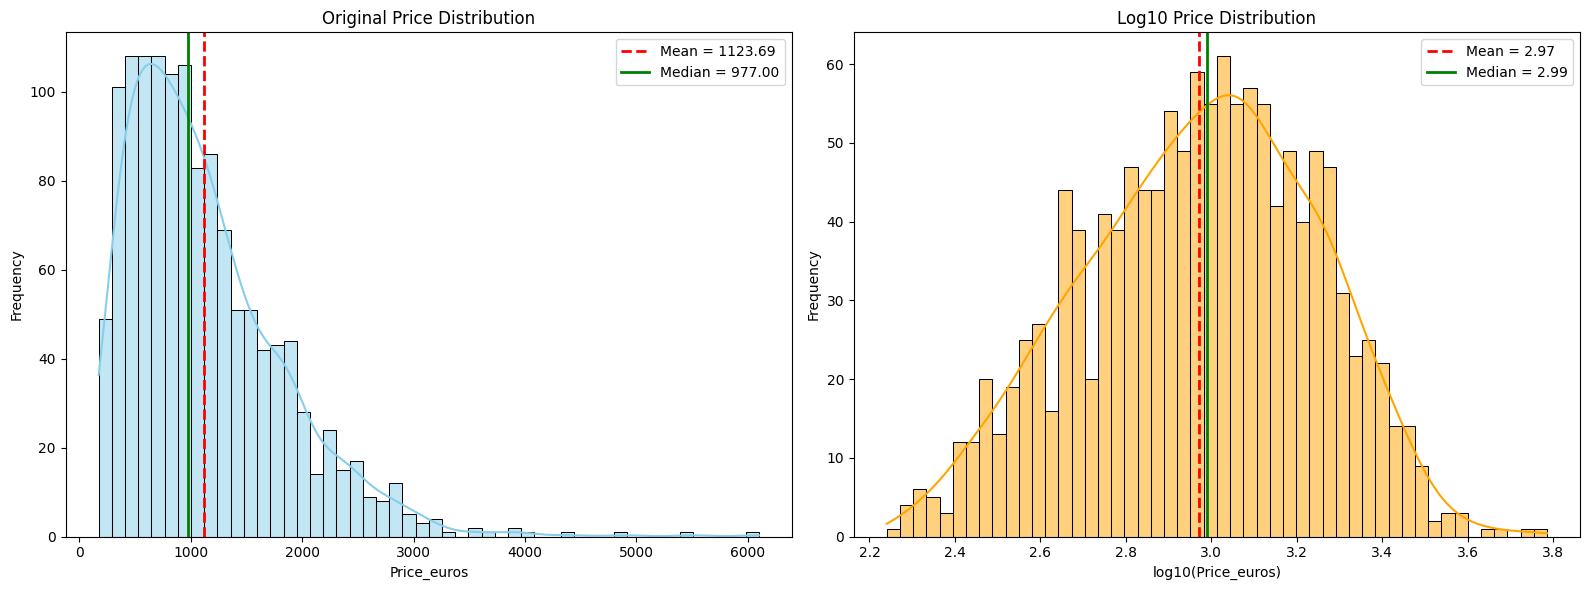

In [126]:
data = df["Price_euros"]
data_log = np.log10(data)


fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.histplot(data, bins=50, kde=True, ax=axes[0], color='skyblue')
mean_val = data.mean()
median_val = data.median()
axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_val:.2f}")
axes[0].axvline(median_val, color='green', linestyle='-', linewidth=2, label=f"Median = {median_val:.2f}")
axes[0].set_title("Original Price Distribution")
axes[0].set_xlabel("Price_euros")
axes[0].set_ylabel("Frequency")
axes[0].legend()

sns.histplot(data_log, bins=50, kde=True, ax=axes[1], color='orange')
mean_log = data_log.mean()
median_log = data_log.median()
axes[1].axvline(mean_log, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_log:.2f}")
axes[1].axvline(median_log, color='green', linestyle='-', linewidth=2, label=f"Median = {median_log:.2f}")
axes[1].set_title("Log10 Price Distribution")
axes[1].set_xlabel("log10(Price_euros)")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

In [127]:
numerical_columns.columns

Index(['Inches', 'Ram', 'Weight', 'Touchscreen', 'IPS', 'Memory_GB'], dtype='object')

In [128]:
def numerical_columns_analysis(df, column_name):
    # Histogram
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df, x=column_name, kde=True, color='red', bins=30)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    mean = df[column_name].mean()
    median = df[column_name].median()
    plt.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot + outlier count
    plt.figure(figsize=(10,8))
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    outlier_count = outliers.shape[0]  # ✅ Correct count

    sns.boxplot(data=df, x=column_name, color='blue', label=f'Outliers: {outlier_count}')
    plt.xlabel(column_name)
    plt.title(f'Boxplot of {column_name}')
    plt.legend()
    plt.tight_layout()
    plt.show()


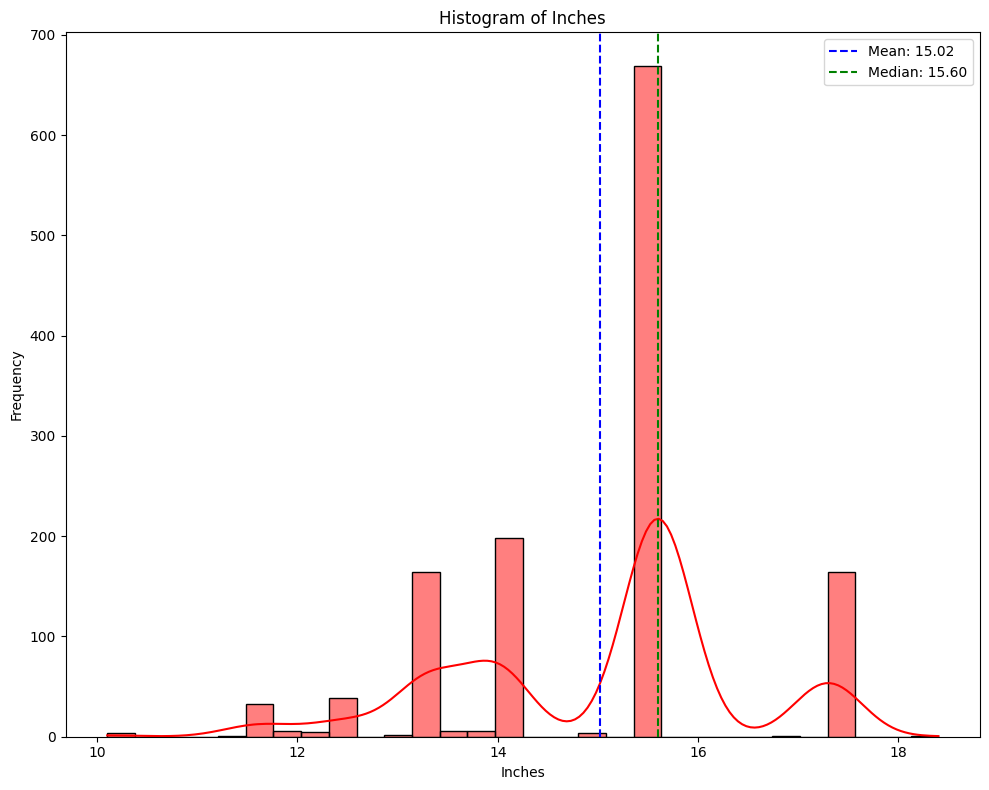

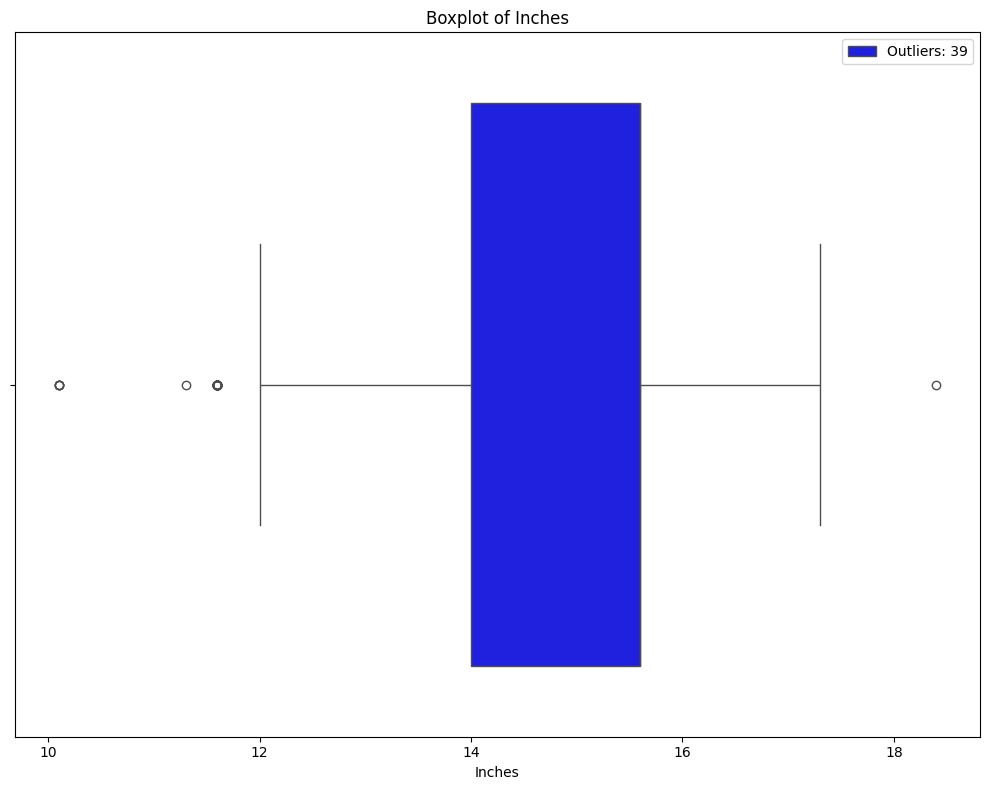

In [129]:
numerical_columns_analysis(df,"Inches")

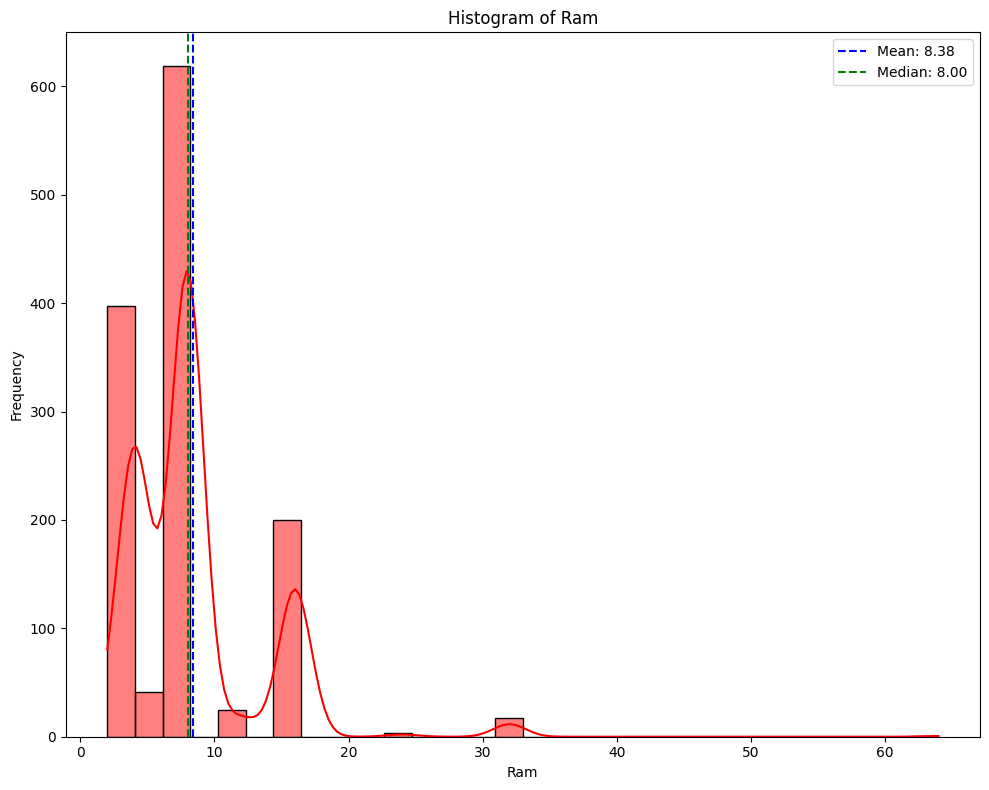

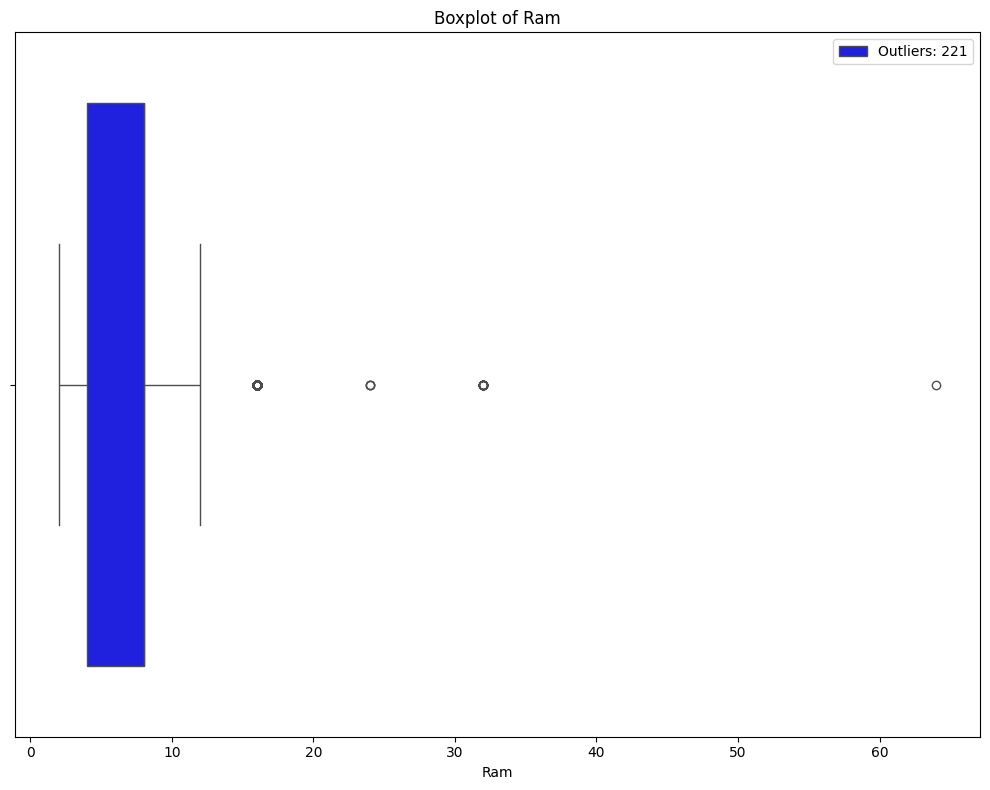

In [130]:
numerical_columns_analysis(df,"Ram")

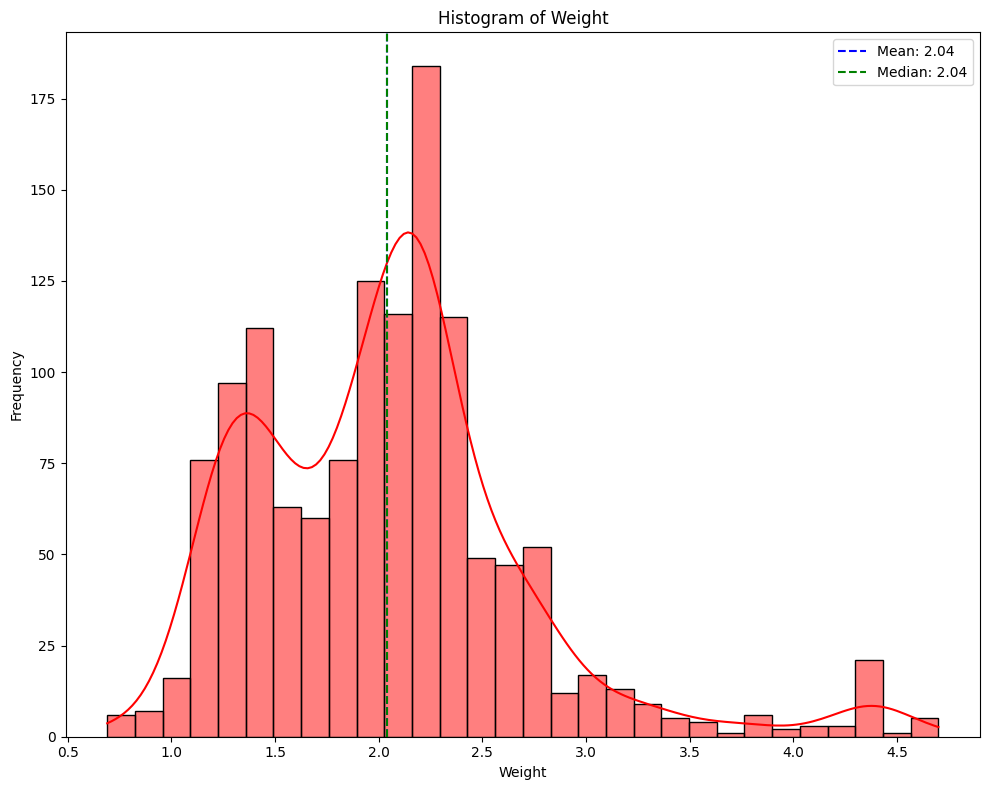

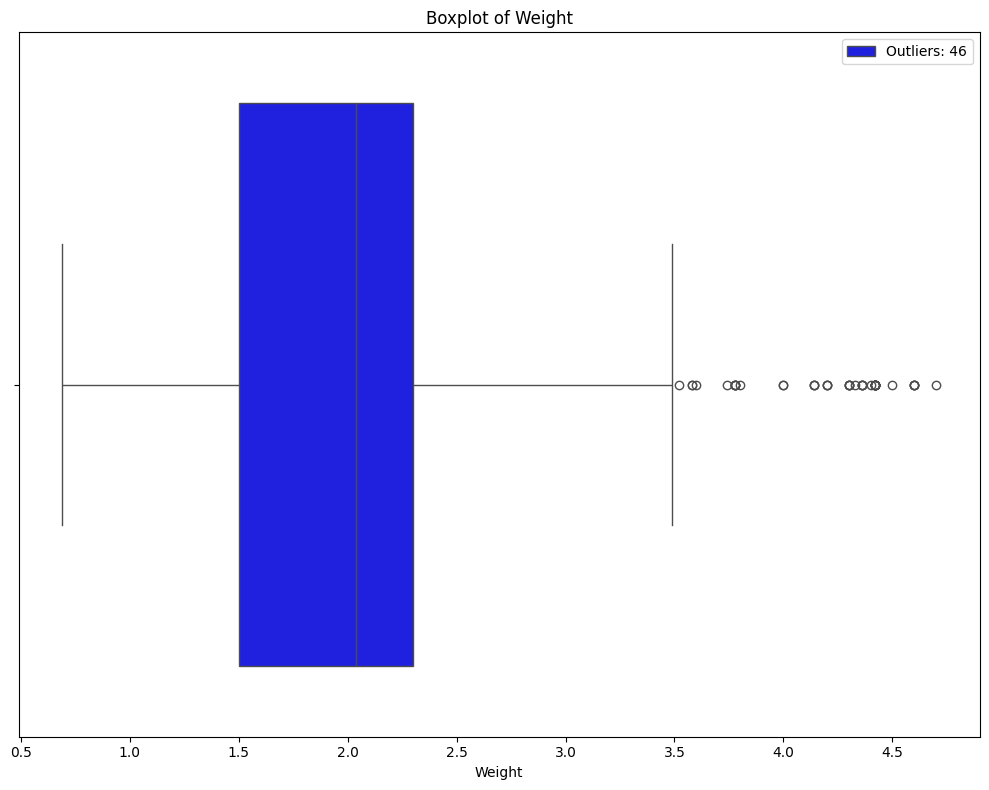

In [131]:
numerical_columns_analysis(df, "Weight")

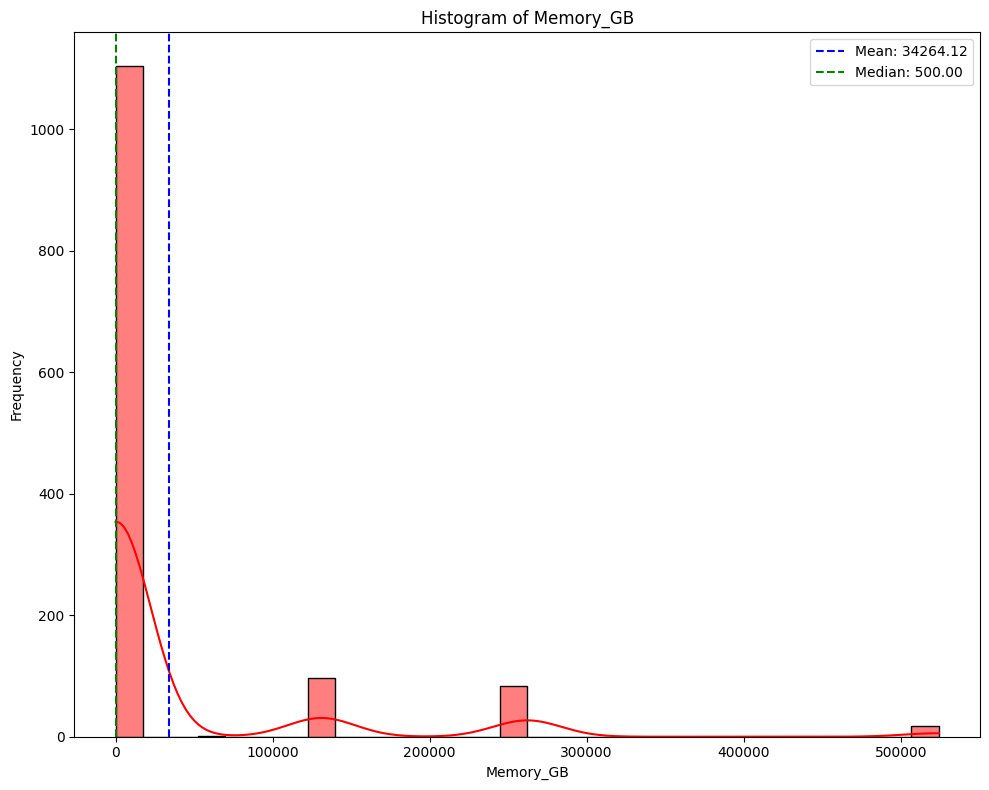

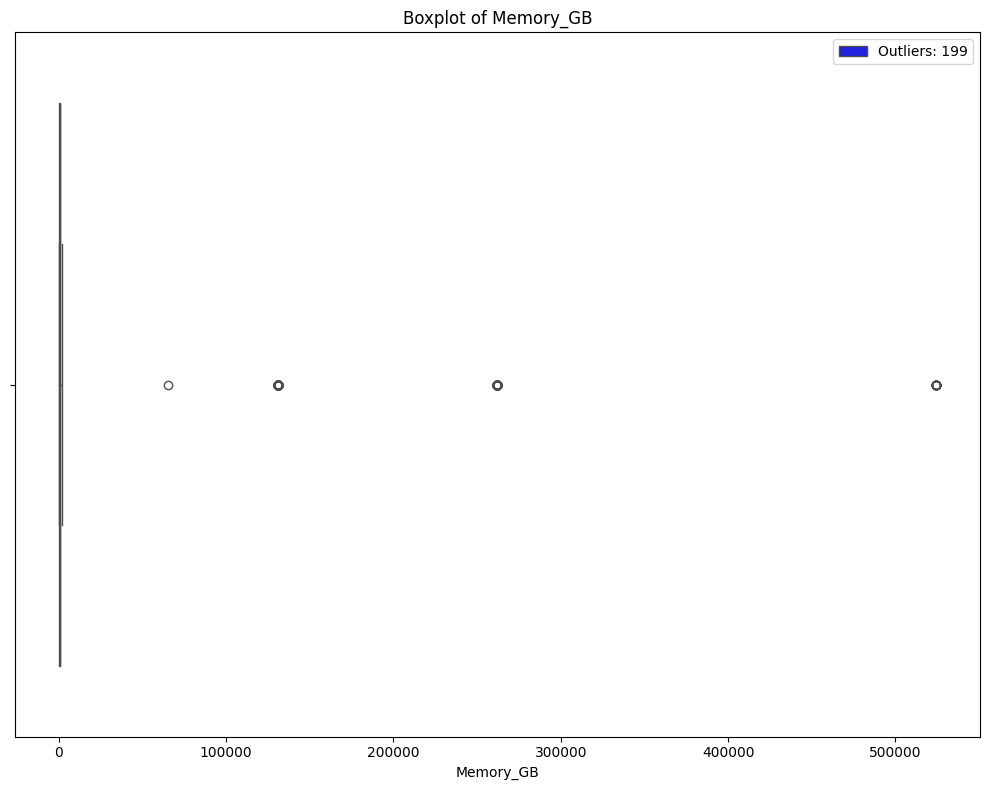

In [132]:
numerical_columns_analysis(df, "Memory_GB")

In [133]:
cat_columns=df.select_dtypes(include="object").columns
cat_columns

Index(['Company', 'TypeName', 'OpSys', 'Resolution_Type', 'Storage_Type',
       'GPU_Brand', 'CPU_Brand'],
      dtype='object')

In [134]:
df.head()
numerical_to_scale=df.select_dtypes(include=["int64","float"]).columns
numerical_to_scale

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'Touchscreen', 'IPS',
       'Memory_GB'],
      dtype='object')

In [135]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from category_encoders import  BinaryEncoder
for column in df.select_dtypes(include=['object' , 'category']).columns:

    unique_values = df[column].nunique()

    if unique_values == 2:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
    elif unique_values <= 7:
        df = pd.get_dummies(df, columns=[column], drop_first=True)
    else :
        encoder = BinaryEncoder()
        encoded_columns = encoder.fit_transform(df[column])
        df = df.join(encoded_columns.add_suffix('_binary')).drop(columns=[column])

In [136]:
X=df.drop(columns=["Price_euros"],axis=1)
Y=np.log10(df["Price_euros"])

In [137]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
column=x_train.columns



In [138]:
x_train.shape[1]

32

In [ ]:
min_max=MinMaxScaler()
x_train=min_max.fit_transform(x_train)
x_test=min_max.transform(x_test)


In [140]:
x_train

array([[0.6626506 , 0.03225806, 0.29177057, ..., 1.        , 0.        ,
        0.        ],
       [0.6626506 , 0.03225806, 0.32668329, ..., 0.        , 0.        ,
        1.        ],
       [0.6626506 , 0.06451613, 0.37406484, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.6626506 , 0.06451613, 0.33665835, ..., 0.        , 0.        ,
        0.        ],
       [0.6626506 , 0.09677419, 0.40149626, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03225806, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [141]:
# build a class have three function to make modeling for many modeles in easy way
class modelling:
    def __init__(self, model, x_test, y_test, x_train, y_train,model_name):
        self.model = model
        self.x_test = x_test
        self.y_test = y_test
        self.x_train = x_train
        self.y_train = y_train
        self.model_name=model_name

    def models_evaluation(self):
        self.model.fit(self.x_train, self.y_train)
        y_pred = self.model.predict(self.x_test)

        mae = mean_absolute_error(self.y_test, y_pred)
        mse = mean_squared_error(self.y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(self.y_test, y_pred)

        train_score = self.model.score(self.x_train, self.y_train)
        test_score = self.model.score(self.x_test, self.y_test)

        self.evaluation_results = {
            'Train Score': train_score,
            'Test Score': test_score,
            'Mean Absolute Error': mae,
            'Mean Squared Error': mse,
            'Root Mean Squared Error': rmse,
            'R-squared': r2
        }

        return self.evaluation_results

    def make_dataframe(self):
        if not hasattr(self, 'evaluation_results'):
            raise ValueError("You must run models_evaluation() before calling make_dataframe()")

        df = pd.DataFrame([self.evaluation_results])
        return df
    
    def make_plot_model(self):
        y_pred = self.model.predict(self.x_test)
        plt.figure(figsize=(7, 5))
        plt.scatter(self.y_test, y_pred, alpha=0.5, color='royalblue')
        plt.plot([self.y_test.min(), self.y_test.max()],
                 [self.y_test.min(), self.y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Rent')
        plt.ylabel('Predicted Rent')
        plt.title(f'Actual vs Predicted Rent: {self.model_name}')
        plt.show()


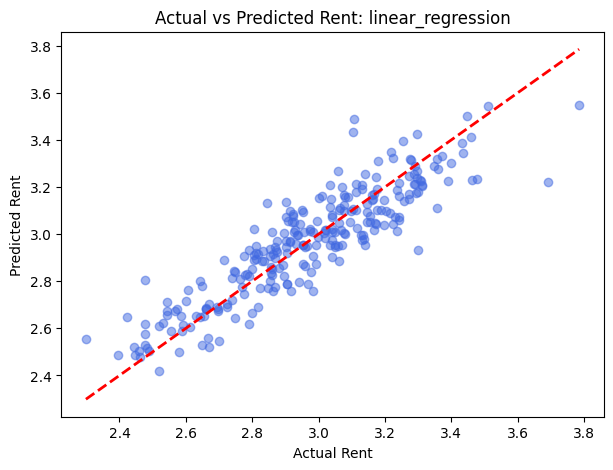

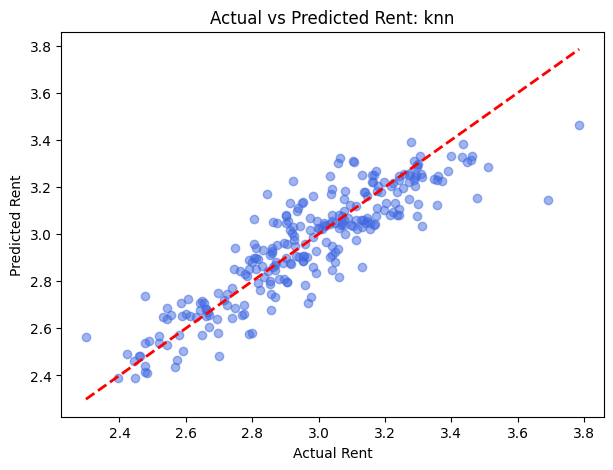

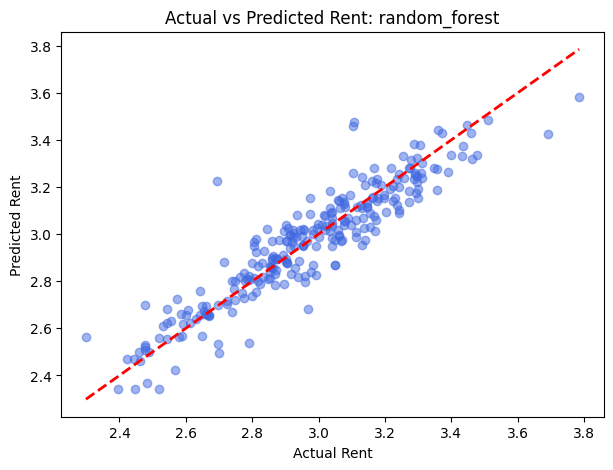

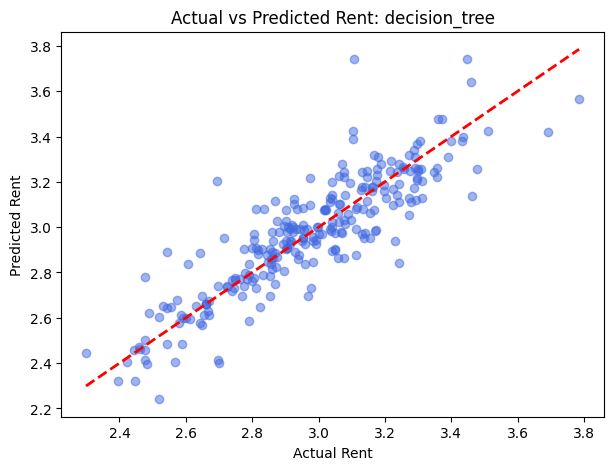

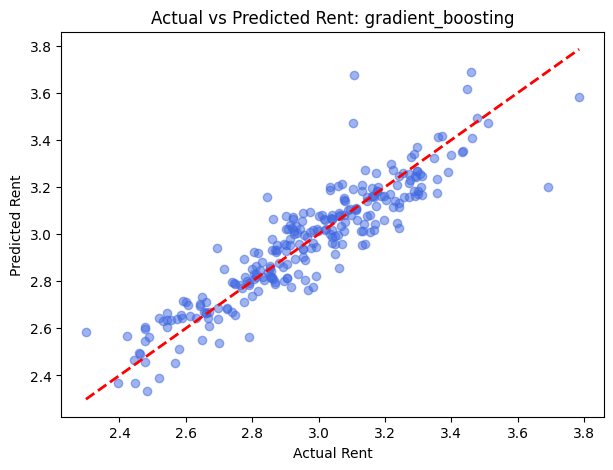

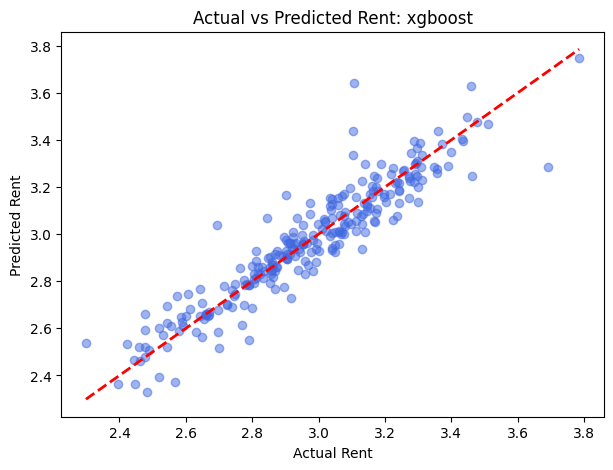

In [142]:
models={'linear_regression':LinearRegression(),
        'knn':KNeighborsRegressor(n_neighbors=5),
         'random_forest': RandomForestRegressor(n_estimators=100, random_state=42),
         'decision_tree': DecisionTreeRegressor(random_state=42),
         'gradient_boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
         'xgboost': XGBRegressor(n_estimators=100, random_state=42),
          } 

models_results={}
for model_name,model in models.items():
    model=modelling(model, x_test, y_test, x_train, y_train ,model_name)
    models_results[model_name]=model.models_evaluation()
    model.make_plot_model()


In [143]:
models=pd.DataFrame(models_results)
models

,linear_regression,knn,random_forest,decision_tree,gradient_boosting,xgboost
Train Score,0.815200,0.885925,0.979355,0.995082,0.904601,0.989512
Test Score,0.799359,0.789643,0.855545,0.745346,0.833064,0.866239
Mean Absolute Error,0.091448,0.090631,0.071727,0.094336,0.077498,0.065542
Mean Squared Error,0.013413,0.014062,0.009657,0.017023,0.011159,0.008942
Root Mean Squared Error,0.115812,0.118583,0.098268,0.130473,0.105638,0.094561
R-squared,0.799359,0.789643,0.855545,0.745346,0.833064,0.866239


In [144]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'linear_regression': {}, # No hyperparameters to tune for Linear Regression
    'knn': {'n_neighbors': [3, 5, 7, 9]},
    'random_forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    'decision_tree': {'max_depth': [None, 5, 10]},
    'gradient_boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
    'xgboost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}

# Initialize models
models = {
    'linear_regression': LinearRegression(),
    'knn': KNeighborsRegressor(),
    'random_forest': RandomForestRegressor(random_state=42),
    'decision_tree': DecisionTreeRegressor(random_state=42),
    'gradient_boosting': GradientBoostingRegressor(random_state=42),
    'xgboost': XGBRegressor(random_state=42)
}

best_models = {}
models_results = {}

for model_name, model in models.items():
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    best_models[model_name] = grid_search.best_estimator_
    models_results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Best R2 Score (Train)': grid_search.best_score_,
        'Test R2 Score': grid_search.best_estimator_.score(x_test, y_test)
    }
    print(f"Finished Grid Search for {model_name}.\n")

# Print the results
for model_name, results in models_results.items():
    print(f"--- {model_name} ---")
    print("Best Parameters:", results['Best Parameters'])
    print("Best R2 Score (Train):", results['Best R2 Score (Train)'])
    print("Test R2 Score:", results['Test R2 Score'])
    print("-" * (len(model_name) + 6))

Performing Grid Search for linear_regression...
Finished Grid Search for linear_regression.

Performing Grid Search for knn...
Finished Grid Search for knn.

Performing Grid Search for random_forest...
Finished Grid Search for random_forest.

Performing Grid Search for decision_tree...
Finished Grid Search for decision_tree.

Performing Grid Search for gradient_boosting...
Finished Grid Search for gradient_boosting.

Performing Grid Search for xgboost...
Finished Grid Search for xgboost.

--- linear_regression ---
Best Parameters: {}
Best R2 Score (Train): 0.7954918531069479
Test R2 Score: 0.7993592413452814
-----------------------
--- knn ---
Best Parameters: {'n_neighbors': 5}
Best R2 Score (Train): 0.811414421363228
Test R2 Score: 0.7896434777758743
---------
--- random_forest ---
Best Parameters: {'max_depth': None, 'n_estimators': 300}
Best R2 Score (Train): 0.867249762658969
Test R2 Score: 0.8549515755428257
-------------------
--- decision_tree ---
Best Parameters: {'max_depth':

In [145]:
best_xgb_model = best_models['xgboost']

y_pred_final_xgb = best_xgb_model.predict(x_test)

print("First 10 predictions from the best XGBoost model:")
print(y_pred_final_xgb[:10])
print(r2_score(y_test,y_pred_final_xgb))
print(best_xgb_model.score(x_train,y_train))
print(best_xgb_model.score(x_test,y_test))

First 10 predictions from the best XGBoost model:
[3.0856152 3.0313754 2.6869266 2.959644  3.1740236 3.1260266 2.890215
 2.64965   3.2126138 2.6424232]
0.8773382734231459
0.9725871339286807
0.8773382734231459


Final XGBoost Model Performance:
Mean Absolute Error (MAE): 0.0632
Mean Squared Error (MSE): 0.0082
Root Mean Squared Error (RMSE): 0.0906
R-squared (R2): 0.8773


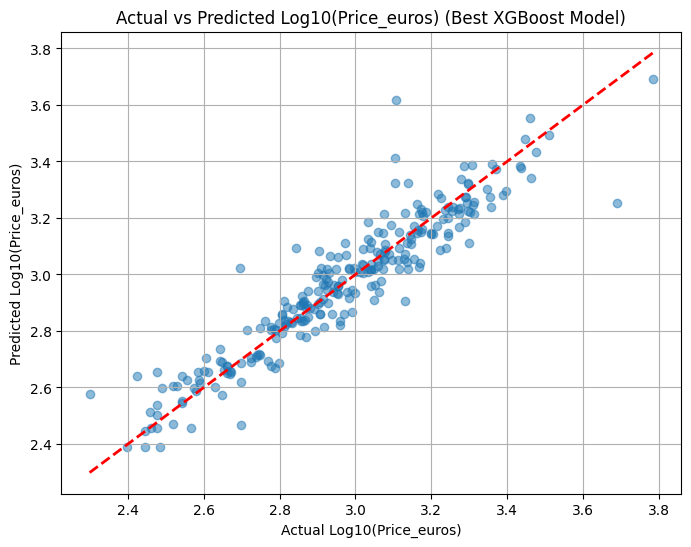

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the final XGBoost model
mae_final_xgb = mean_absolute_error(y_test, y_pred_final_xgb)
mse_final_xgb = mean_squared_error(y_test, y_pred_final_xgb)
rmse_final_xgb = np.sqrt(mse_final_xgb)
r2_final_xgb = r2_score(y_test, y_pred_final_xgb)

print(f"Final XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_final_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_final_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final_xgb:.4f}")
print(f"R-squared (R2): {r2_final_xgb:.4f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Log10(Price_euros)')
plt.ylabel('Predicted Log10(Price_euros)')
plt.title('Actual vs Predicted Log10(Price_euros) (Best XGBoost Model)')
plt.grid(True)
plt.show()

In [147]:
data_frame[data_frame.duplicated()]
data_frame=data_frame.drop_duplicates()

In [148]:
data_frame.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,Resolution_Type,Storage_Type,Memory_GB,GPU_Brand,CPU_Brand
0,Apple,Ultrabook,13.3,8,mac,1.37,1339.69,0,1,Other,SSD,128,Intel,Intel Core i5
1,Apple,Ultrabook,13.3,8,mac,1.34,898.94,0,0,Other,Other,128,Intel,Intel Core i5
2,HP,Notebook,15.6,8,Windows,1.86,575.00,0,0,Full HD,SSD,256,Intel,Intel Core i5
3,Apple,Ultrabook,15.4,16,mac,1.83,2537.45,0,1,Other,SSD,512,AMD,Intel Core i7
4,Apple,Ultrabook,13.3,8,mac,1.37,1803.60,0,1,Other,SSD,256,Intel,Intel Core i5


In [149]:
numerical_columns.columns


Index(['Inches', 'Ram', 'Weight', 'Touchscreen', 'IPS', 'Memory_GB'], dtype='object')

In [150]:
def numerical_columns_analysis(df, column_name):
    # Histogram
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df, x=column_name, kde=True, color='red', bins=30)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    mean = df[column_name].mean()
    median = df[column_name].median()
    plt.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot + outlier count
    plt.figure(figsize=(10,8))
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    outlier_count = outliers.shape[0]  # ✅ Correct count

    sns.boxplot(data=df, x=column_name, color='blue', label=f'Outliers: {outlier_count}')
    plt.xlabel(column_name)
    plt.title(f'Boxplot of {column_name}')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [151]:
x_final=data_frame.drop(["Price_euros"],axis=1)
y_final=data_frame["Price_euros"]

In [152]:
x_train_final,x_test_final,y_train_final,y_test_final = train_test_split(x_final,y_final,test_size=0.2,random_state=42)

In [153]:
x_final.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Touchscreen,IPS,Resolution_Type,Storage_Type,Memory_GB,GPU_Brand,CPU_Brand
0,Apple,Ultrabook,13.3,8,mac,1.37,0,1,Other,SSD,128,Intel,Intel Core i5
1,Apple,Ultrabook,13.3,8,mac,1.34,0,0,Other,Other,128,Intel,Intel Core i5
2,HP,Notebook,15.6,8,Windows,1.86,0,0,Full HD,SSD,256,Intel,Intel Core i5
3,Apple,Ultrabook,15.4,16,mac,1.83,0,1,Other,SSD,512,AMD,Intel Core i7
4,Apple,Ultrabook,13.3,8,mac,1.37,0,1,Other,SSD,256,Intel,Intel Core i5


In [154]:
y_test_final.head()

43       682.0
1161    1769.0
128     1396.0
1233    1598.0
1194    1199.0
Name: Price_euros, dtype: float64

In [155]:
cat_columns=data_frame.select_dtypes(include="object").columns
cat_columns

Index(['Company', 'TypeName', 'OpSys', 'Resolution_Type', 'Storage_Type',
       'GPU_Brand', 'CPU_Brand'],
      dtype='object')

In [156]:
data_frame.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,Resolution_Type,Storage_Type,Memory_GB,GPU_Brand,CPU_Brand
0,Apple,Ultrabook,13.3,8,mac,1.37,1339.69,0,1,Other,SSD,128,Intel,Intel Core i5
1,Apple,Ultrabook,13.3,8,mac,1.34,898.94,0,0,Other,Other,128,Intel,Intel Core i5
2,HP,Notebook,15.6,8,Windows,1.86,575.00,0,0,Full HD,SSD,256,Intel,Intel Core i5
3,Apple,Ultrabook,15.4,16,mac,1.83,2537.45,0,1,Other,SSD,512,AMD,Intel Core i7
4,Apple,Ultrabook,13.3,8,mac,1.37,1803.60,0,1,Other,SSD,256,Intel,Intel Core i5


In [157]:
numerical_to_scale

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'Touchscreen', 'IPS',
       'Memory_GB'],
      dtype='object')

In [158]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['Inches', 'Ram', 'Weight', 'Touchscreen', 'IPS',
       'Memory_GB']),  
        ('cat', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_columns) 
    ]
)
param_grids = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


xgb_model = XGBRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grids,
    cv=5,                
    scoring='r2',        
    n_jobs=-1            
)



# Pipeline
Pip = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', grid_search)
])

# Fit
Pip.fit(x_train_final, y_train_final)

# Predict
y_pred = Pip.predict(x_test_final)
print(y_pred[:10])


[ 654.7907  2296.9397  1396.8508  1661.2954  1011.80365 2162.4949
 1483.79     434.98935 1195.002   3072.0266 ]


In [159]:
y_pred

array([ 654.7907 , 2296.9397 , 1396.8508 , 1661.2954 , 1011.80365,
       2162.4949 , 1483.79   ,  434.98935, 1195.002  , 3072.0266 ,
       1008.73914,  975.94635,  982.2599 ,  620.6557 , 1401.8163 ,
       1924.828  , 1716.2596 ,  517.666  , 1717.8306 , 1769.1665 ,
        285.59305,  820.7239 ,  604.2751 , 1704.3654 ,  459.06104,
        958.23645,  722.25085, 1127.8638 , 1501.5345 ,  878.8804 ,
       1031.0304 , 1063.4172 ,  499.9705 ,  690.97046, 1580.7828 ,
        929.18677,  769.69696, 1144.3064 , 1800.9489 , 1631.1978 ,
        490.9079 , 2593.4236 , 1181.0178 ,  644.3173 , 1170.735  ,
       1532.4143 , 1713.3099 ,  797.9895 , 1240.9038 , 1006.31964,
       1230.4313 ,  392.8305 ,  970.0159 ,  600.1322 , 1371.3882 ,
        992.3304 , 1737.346  ,  505.64313,  859.11804, 5490.2764 ,
       2850.6653 , 1142.2638 , 1416.9545 ,  317.01382, 1737.09   ,
        707.8163 ,  430.45126,  693.8611 ,  743.21545, 1044.3414 ,
       1893.0785 ,  524.04346, 1436.4463 , 2734.9678 ,  505.03

In [160]:
score = Pip.score(x_test_final, y_test_final)
print(f"Test score: {score}")

Test score: 0.8453404790178309


In [161]:
r2_score(y_test_final,y_pred)

0.8453404790178309

In [162]:
joblib.dump(Pip, "laptop_price_model.pkl")

['laptop_price_model.pkl']